# COVID-19 Pandemic in India.

***About Covid-19***




The coronavirus (COVID-19) pandemic has spread widely, and the number of cases is rising daily. The government is working on slow down its spread.

Till date it has spread across 216 countries infecting 13,480,009 people and killing 581,722 so far. In India, as many as 9lac+ COVID19 cases have been reported so far. Of these, 5lac+ have recovered and 24,309 have died. COVID19.

**Problem Statement**
Globally the researcher are using AI and machine learning to analyze, predict, and take safety measures against COVID-19 in India.

**Goal:**
We need a explore the COVID situation in India and the world, and strong model that predicts how the virus could spread across India in the next 15 days.





Task:

1.  Analyze the present condition in India till date 15/07/2020
2.	Scrape out the COVID-19 from websites 
3.	Analysing COVID19 Cases in India
4.	Figure out the death rate and cure rate per 100 across the affected states 
5.	Create different charts to visualize the following
a.	Age group distribution of affected patients 
b.  Total Confirmed/Recovered/Deaths in india
c.  ICMR testing centres in each state
6.  Use Prophet to predict the confirmed cases in India 
7.  Use ARIMA to predict the confirmed cases in India 
8.  Compare the Indian COVID cases globally.


# Importing the required libraries

In [ ]:
# importing the required libraries
import pandas as pd

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins

# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

## 1. Scraping the datasets from the [official Goverment website](https://www.mohfw.gov.in)


In [ ]:
# for date and time opeations
from datetime import datetime
# for file and folder operations
import os
# for regular expression opeations
import re
# for listing files in a folder
import glob
# for getting web contents
import requests 
# for scraping web contents
from bs4 import BeautifulSoup

In [ ]:
# get data

# link at which web data recides
link = 'https://www.mohfw.gov.in/'
# get web data
req = requests.get(link)
# parse web data
soup = BeautifulSoup(req.content, "html.parser")

In [ ]:
# find the table
# ==============
# our target table is the last table in the page

# get the table head
# table head may contain the column names, titles, subtitles
thead = soup.find_all('thead')[-1]
# print(thead)

# get all the rows in table head
# it usually have only one row, which has the column names
head = thead.find_all('tr')
# print(head)

# get the table tbody
# it contains the contents
tbody = soup.find_all('tbody')[-1]
# print(tbody)

# get all the rows in table body
# each row is each state's entry
body = tbody.find_all('tr')
# print(body)

In [ ]:
# get the table contents
# ======================

# container for header rows / column title
head_rows = []
# container for table body / contents
body_rows = []

# loop through the head and append each row to head
for tr in head:
    td = tr.find_all(['th', 'td'])
    row = [i.text for i in td]
    head_rows.append(row)
# print(head_rows)

# loop through the body and append each row to body
for tr in body:
    td = tr.find_all(['th', 'td'])
    row = [i.text for i in td]
    body_rows.append(row)
# print(head_rows)

In [ ]:
# save contents in a dataframe
# ============================
    
# skip last 3 rows, it contains unwanted info
# head_rows contains column title
df_bs = pd.DataFrame(body_rows[:len(body_rows)-6], 
                     columns=head_rows[0])         

# Drop 'S. No.' column
df_bs.drop('S. No.', axis=1, inplace=True)

# there are 36 states+UT in India
df_bs.head(36)

,Name of State / UT,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*
0,Andaman and Nicobar Islands,57,109,0,166
1,Andhra Pradesh,15144,17467,408,33019
2,Arunachal Pradesh,306,153,3,462
3,Assam,6351,11416,40,17807
4,Bihar,6261,12849,174,19284
5,Chandigarh,144,446,10,600
6,Chhattisgarh,1084,3275,20,4379
7,Dadra and Nagar Haveli and Daman and Diu,209,310,1,520
8,Delhi,18664,93236,3446,115346
9,Goa,1128,1607,18,2753


**Data Cleaning **

In [ ]:
# date-time information
# =====================
#saving a copy of the dataframe
df_India = df_bs.copy()
# today's date
now  = datetime.now()
# format date to month-day-year
df_India['Date'] = now.strftime("%m/%d/%Y") 

# add 'Date' column to dataframe
df_India['Date'] = pd.to_datetime(df_India['Date'], format='%m/%d/%Y')

# df_India.head(36)

In [ ]:
# remove extra characters from 'Name of State/UT' column
df_India['Name of State / UT'] = df_India['Name of State / UT'].str.replace('#', '')
df_India['Deaths**'] = df_India['Deaths**'].str.replace('#', '')

In [ ]:
# latitude and longitude information
# ==================================

# latitude of the states
lat = {'Delhi':28.7041, 'Haryana':29.0588, 'Kerala':10.8505, 'Rajasthan':27.0238,
       'Telengana':18.1124, 'Uttar Pradesh':26.8467, 'Ladakh':34.2996, 'Tamil Nadu':11.1271,
       'Jammu and Kashmir':33.7782, 'Punjab':31.1471, 'Karnataka':15.3173, 'Maharashtra':19.7515,
       'Andhra Pradesh':15.9129, 'Odisha':20.9517, 'Uttarakhand':30.0668, 'West Bengal':22.9868, 
       'Puducherry': 11.9416, 'Chandigarh': 30.7333, 'Chhattisgarh':21.2787, 'Gujarat': 22.2587, 
       'Himachal Pradesh': 31.1048, 'Madhya Pradesh': 22.9734, 'Bihar': 25.0961, 'Manipur':24.6637, 
       'Mizoram':23.1645, 'Goa': 15.2993, 'Andaman and Nicobar Islands': 11.7401, 'Assam' : 26.2006, 
       'Jharkhand': 23.6102, 'Arunachal Pradesh': 28.2180, 'Tripura': 23.9408, 'Nagaland': 26.1584, 
       'Meghalaya' : 25.4670, 'Dadar Nagar Haveli' : 20.1809, 'Sikkim': 27.5330}

# longitude of the states
long = {'Delhi':77.1025, 'Haryana':76.0856, 'Kerala':76.2711, 'Rajasthan':74.2179,
        'Telengana':79.0193, 'Uttar Pradesh':80.9462, 'Ladakh':78.2932, 'Tamil Nadu':78.6569,
        'Jammu and Kashmir':76.5762, 'Punjab':75.3412, 'Karnataka':75.7139, 'Maharashtra':75.7139,
        'Andhra Pradesh':79.7400, 'Odisha':85.0985, 'Uttarakhand':79.0193, 'West Bengal':87.8550, 
        'Puducherry': 79.8083, 'Chandigarh': 76.7794, 'Chhattisgarh':81.8661, 'Gujarat': 71.1924, 
        'Himachal Pradesh': 77.1734, 'Madhya Pradesh': 78.6569, 'Bihar': 85.3131, 'Manipur':93.9063, 
        'Mizoram':92.9376, 'Goa': 74.1240, 'Andaman and Nicobar Islands': 92.6586, 'Assam' : 92.9376, 
        'Jharkhand': 85.2799, 'Arunachal Pradesh': 94.7278, 'Tripura': 91.9882, 'Nagaland': 94.5624,
        'Meghalaya' : 91.3662, 'Dadar Nagar Haveli' : 73.0169, 'Sikkim': 88.5122}

# add latitude column based on 'Name of State / UT' column
df_India['Latitude'] = df_India['Name of State / UT'].map(lat)

# add longitude column based on 'Name of State / UT' column
df_India['Longitude'] = df_India['Name of State / UT'].map(long)

df_India.head(36)

,Name of State / UT,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*,Date,Latitude,Longitude
0,Andaman and Nicobar Islands,57,109,0,166,2020-07-15,11.7401,92.6586
1,Andhra Pradesh,15144,17467,408,33019,2020-07-15,15.9129,79.7400
2,Arunachal Pradesh,306,153,3,462,2020-07-15,28.2180,94.7278
3,Assam,6351,11416,40,17807,2020-07-15,26.2006,92.9376
4,Bihar,6261,12849,174,19284,2020-07-15,25.0961,85.3131
5,Chandigarh,144,446,10,600,2020-07-15,30.7333,76.7794
6,Chhattisgarh,1084,3275,20,4379,2020-07-15,21.2787,81.8661
7,Dadra and Nagar Haveli and Daman and Diu,209,310,1,520,2020-07-15,NaN,NaN
8,Delhi,18664,93236,3446,115346,2020-07-15,28.7041,77.1025
9,Goa,1128,1607,18,2753,2020-07-15,15.2993,74.1240


In [ ]:

# rename columns
    
df_India = df_India.rename(columns={'Cured/Discharged/Migrated' :'Cured/Discharged', 
                                      'Total Confirmed cases *': 'Confirmed', 
                                      'Total Confirmed cases ': 'Confirmed', 
                                      'Total Confirmed cases* ': 'Confirmed'})
df_India = df_India.rename(columns={'Cured/Discharged':'Cured'})
df_India = df_India.rename(columns={'Name of State / UT':'State/UnionTerritory'})
df_India = df_India.rename(columns={'Name of State / UT':'State/UnionTerritory'})

df_India = df_India.rename(columns=lambda x: re.sub('Total Confirmed cases \(Including .* foreign Nationals\) ',
                                                      'Total Confirmed cases',x))
df_India = df_India.rename(columns={'Deaths ( more than 70% cases due to comorbidities )':'Deaths', 
                                      'Deaths**':'Deaths'})

In [ ]:
# unique state names
df_India['State/UnionTerritory'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttarakhand',
       'Uttar Pradesh', 'West Bengal'], dtype=object)

In [ ]:
# number of missing values 
df_India.isna().sum()

State/UnionTerritory          0
Active Cases*                 0
Cured/Discharged/Migrated*    0
Deaths                        0
Total Confirmed cases*        0
Date                          0
Latitude                      2
Longitude                     2
dtype: int64

In [ ]:
# number of unique values 
df_India.nunique()

State/UnionTerritory          35
Active Cases*                 35
Cured/Discharged/Migrated*    35
Deaths                        28
Total Confirmed cases*        35
Date                           1
Latitude                      33
Longitude                     30
dtype: int64

## Saving Data:

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
# saving data
# ===========

# file names as year-month-day.csv format
file_name = now.strftime("%Y_%m_%d")+' - COVID-19_India.csv'

# location for saving the file
file_loc = '/content/drive/My Drive/covid_19'

# save file as a scv file
df_India.to_csv(file_loc + file_name, index=False)

# df_India.head(36)

In [ ]:
# fix datatype
df_India['Date'] = pd.to_datetime(df_India['Date'])

## Final dataframe

In [ ]:
df_India.head(36)

,State/UnionTerritory,Active Cases*,Cured/Discharged/Migrated*,Deaths,Total Confirmed cases*,Date,Latitude,Longitude
0,Andaman and Nicobar Islands,57,109,0,166,2020-07-15,11.7401,92.6586
1,Andhra Pradesh,15144,17467,408,33019,2020-07-15,15.9129,79.7400
2,Arunachal Pradesh,306,153,3,462,2020-07-15,28.2180,94.7278
3,Assam,6351,11416,40,17807,2020-07-15,26.2006,92.9376
4,Bihar,6261,12849,174,19284,2020-07-15,25.0961,85.3131
5,Chandigarh,144,446,10,600,2020-07-15,30.7333,76.7794
6,Chhattisgarh,1084,3275,20,4379,2020-07-15,21.2787,81.8661
7,Dadra and Nagar Haveli and Daman and Diu,209,310,1,520,2020-07-15,NaN,NaN
8,Delhi,18664,93236,3446,115346,2020-07-15,28.7041,77.1025
9,Goa,1128,1607,18,2753,2020-07-15,15.2993,74.1240


In [ ]:
# complete data info
df_India.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   State/UnionTerritory        35 non-null     object        
 1   Active Cases*               35 non-null     object        
 2   Cured/Discharged/Migrated*  35 non-null     object        
 3   Deaths                      35 non-null     object        
 4   Total Confirmed cases*      35 non-null     object        
 5   Date                        35 non-null     datetime64[ns]
 6   Latitude                    33 non-null     float64       
 7   Longitude                   33 non-null     float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 2.3+ KB


In [ ]:
# saving data
# ===========

# file names as year-month-day.csv format
file_name = now.strftime("%Y_%m_%d")+' - COVID-19_India_preprocessed.csv'

# location for saving the file
file_loc = '/content/drive/My Drive/covid_19'

# save file as a scv file
df_India.to_csv(file_loc + file_name, index=False)

In [ ]:
#Learn how to read a .csv file by creating a dataframe using pandas
# Reading the datasets
df= pd.read_csv('/content/drive/My Drive/covid_192020_07_15 - COVID-19_India.csv')
df_india = df.copy()
df

,State/UnionTerritory,Active Cases*,Cured/Discharged/Migrated*,Deaths,Total Confirmed cases*,Date,Latitude,Longitude
0,Andaman and Nicobar Islands,57,109,0,166,2020-07-15,11.7401,92.6586
1,Andhra Pradesh,15144,17467,408,33019,2020-07-15,15.9129,79.7400
2,Arunachal Pradesh,306,153,3,462,2020-07-15,28.2180,94.7278
3,Assam,6351,11416,40,17807,2020-07-15,26.2006,92.9376
4,Bihar,6261,12849,174,19284,2020-07-15,25.0961,85.3131
5,Chandigarh,144,446,10,600,2020-07-15,30.7333,76.7794
6,Chhattisgarh,1084,3275,20,4379,2020-07-15,21.2787,81.8661
7,Dadra and Nagar Haveli and Daman and Diu,209,310,1,520,2020-07-15,NaN,NaN
8,Delhi,18664,93236,3446,115346,2020-07-15,28.7041,77.1025
9,Goa,1128,1607,18,2753,2020-07-15,15.2993,74.1240


# Analysing COVID19 Cases in India

In [ ]:
total_cases = df['Total Confirmed cases*'].sum()
print('Total number of confirmed COVID 2019 cases across India till date (15nd Jul, 2020):', total_cases)

Total number of confirmed COVID 2019 cases across India till date (15nd Jul, 2020): 934657


In [ ]:
#Learn how to highlight your dataframe
df_temp = df.drop(['Latitude', 'Longitude', 'Date'], axis = 1) #Removing Date, Latitude and Longitude and other extra columns
df_temp.style.background_gradient(cmap='Reds')

,State/UnionTerritory,Active Cases*,Cured/Discharged/Migrated*,Deaths,Total Confirmed cases*
0,Andaman and Nicobar Islands,57,109,0,166
1,Andhra Pradesh,15144,17467,408,33019
2,Arunachal Pradesh,306,153,3,462
3,Assam,6351,11416,40,17807
4,Bihar,6261,12849,174,19284
5,Chandigarh,144,446,10,600
6,Chhattisgarh,1084,3275,20,4379
7,Dadra and Nagar Haveli and Daman and Diu,209,310,1,520
8,Delhi,18664,93236,3446,115346
9,Goa,1128,1607,18,2753


In [ ]:
today = now.strftime("%Y_%m_%d")
total_cured = df['Cured/Discharged/Migrated*'].sum()
print("Total people who were cured as of "+today+" are: ", total_cured)
total_cases = df['Total Confirmed cases*'].sum()
print("Total people who were detected COVID+ve as of "+today+" are: ", total_cases)
total_death = df['Deaths'].sum()
print("Total people who died due to COVID19 as of "+today+" are: ",total_death)
total_active = total_cases-total_cured-total_death
print("Total active COVID19 cases as of "+today+" are: ",total_active)

Total people who were cured as of 2020_07_15 are:  592032
Total people who were detected COVID+ve as of 2020_07_15 are:  934657
Total people who died due to COVID19 as of 2020_07_15 are:  24309
Total active COVID19 cases as of 2020_07_15 are:  318316


In [ ]:
#Total Active  is the Total cases - (Number of death + Cured)
df['Total Active'] = df['Total Confirmed cases*'] - (df['Deaths'])
total_active = df['Total Active'].sum()
print('Total number of active COVID 2019 cases across India:', total_active)
Tot_Cases = df.groupby('State/UnionTerritory')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

Total number of active COVID 2019 cases across India: 910348


,Total Active
State/UnionTerritory,
Maharashtra,256970
Tamil Nadu,145225
Delhi,111900
Karnataka,43235
Gujarat,41568
Uttar Pradesh,38741
Telangana,37370
Andhra Pradesh,32611
West Bengal,31858


In [ ]:
import numpy as np
state_cases = df_india.groupby('State/UnionTerritory')['Total Confirmed cases*','Deaths','Cured/Discharged/Migrated*'].max().reset_index()

#state_cases = state_cases.astype({'Deaths': 'int'})
state_cases['Active'] = state_cases['Total Confirmed cases*'] - (state_cases['Deaths']+state_cases['Cured/Discharged/Migrated*'])
state_cases["Death Rate (per 100)"] = np.round(100*state_cases["Deaths"]/state_cases["Total Confirmed cases*"],2)
state_cases["Cure Rate (per 100)"] = np.round(100*state_cases["Cured/Discharged/Migrated*"]/state_cases["Total Confirmed cases*"],2)
state_cases.sort_values('Total Confirmed cases*', ascending= False).fillna(0).style.background_gradient(cmap='Blues',subset=["Total Confirmed cases*"])\
                        .background_gradient(cmap='Blues',subset=["Deaths"])\
                        .background_gradient(cmap='Blues',subset=["Cured/Discharged/Migrated*"])\
                        .background_gradient(cmap='Blues',subset=["Active"])\
                        .background_gradient(cmap='Blues',subset=["Death Rate (per 100)"])\
                        .background_gradient(cmap='Blues',subset=["Cure Rate (per 100)"])

,State/UnionTerritory,Total Confirmed cases*,Deaths,Cured/Discharged/Migrated*,Active,Death Rate (per 100),Cure Rate (per 100)
19,Maharashtra,267665,10695,149007,107963,4.000000,55.670000
29,Tamil Nadu,147324,2099,97310,47915,1.420000,66.050000
8,Delhi,115346,3446,93236,18664,2.990000,80.830000
15,Karnataka,44077,842,17390,25845,1.910000,39.450000
10,Gujarat,43637,2069,30503,11065,4.740000,69.900000
32,Uttar Pradesh,39724,983,24983,13758,2.470000,62.890000
30,Telangana,37745,375,24840,12530,0.990000,65.810000
1,Andhra Pradesh,33019,408,17467,15144,1.240000,52.900000
34,West Bengal,32838,980,19931,11927,2.980000,60.690000
27,Rajasthan,25571,525,19161,5885,2.050000,74.930000


# Visualization Inference:

•	Maharashtra, Tamil Naidu, Gujrat and Delhi are wisely affected states with    maximum number of confirmed cases.
•	Till 15nd of july 24309 people have died in India.
•	Death rate are more Gujrat and Maharashtra.


# COVID Insights in India

In [ ]:
age_details = pd.read_csv('/content/drive/My Drive/covid_19/AgeGroupDetails.csv')
india_covid_19 = pd.read_csv('/content/drive/My Drive/covid_19/covid_19_india.csv')
hospital_beds = pd.read_csv('/content/drive/My Drive/covid_19/HospitalBedsIndia.csv')
individual_details = pd.read_csv('/content/drive/My Drive/covid_19/IndividualDetails.csv')
ICMR_details = pd.read_csv('/content/drive/My Drive/covid_19/ICMRTestingDetails.csv')
ICMR_labs = pd.read_csv('/content/drive/My Drive/covid_19/ICMRTestingLabs.csv')
state_testing = pd.read_csv('/content/drive/My Drive/covid_19/StatewiseTestingDetails.csv')
population = pd.read_csv('/content/drive/My Drive/covid_19/population_india_census2011.csv')

In [ ]:
india_covid_19['Date'] = pd.to_datetime(india_covid_19['Date'],dayfirst = True)
state_testing['Date'] = pd.to_datetime(state_testing['Date'])
ICMR_details['DateTime'] = pd.to_datetime(ICMR_details['DateTime'],dayfirst = True)
ICMR_details = ICMR_details.dropna(subset=['TotalSamplesTested', 'TotalPositiveCases'])

In [ ]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-04-2020.csv')

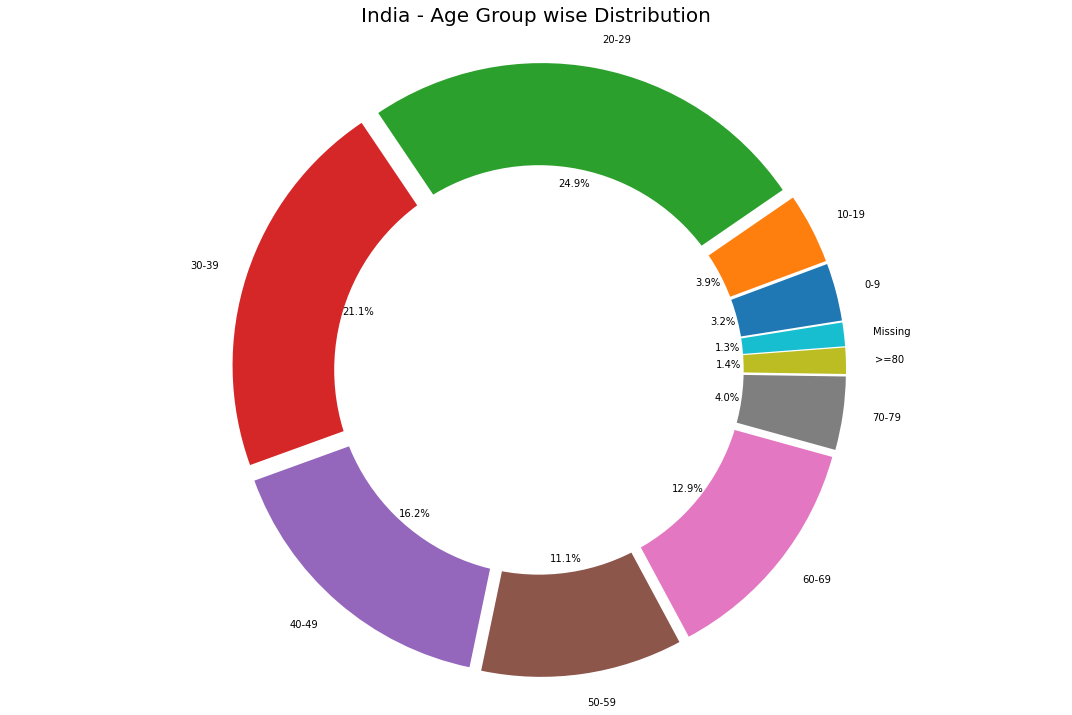

In [ ]:
labels = list(age_details['AgeGroup'])
sizes = list(age_details['TotalCases'])

explode = []

for i in labels:
    explode.append(0.05)
    
plt.figure(figsize= (15,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, explode =explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('India - Age Group wise Distribution',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()

As per result see that the age group 20-49 in between rate of 62.2% is the most affected which is against the trend which says younger people are more at risk of being affected. Only 29.4% of people age between 50-80+ are affected.

In [ ]:
dates = list(confirmed_df.columns[4:])
dates = list(pd.to_datetime(dates))
dates_india = dates[8:]

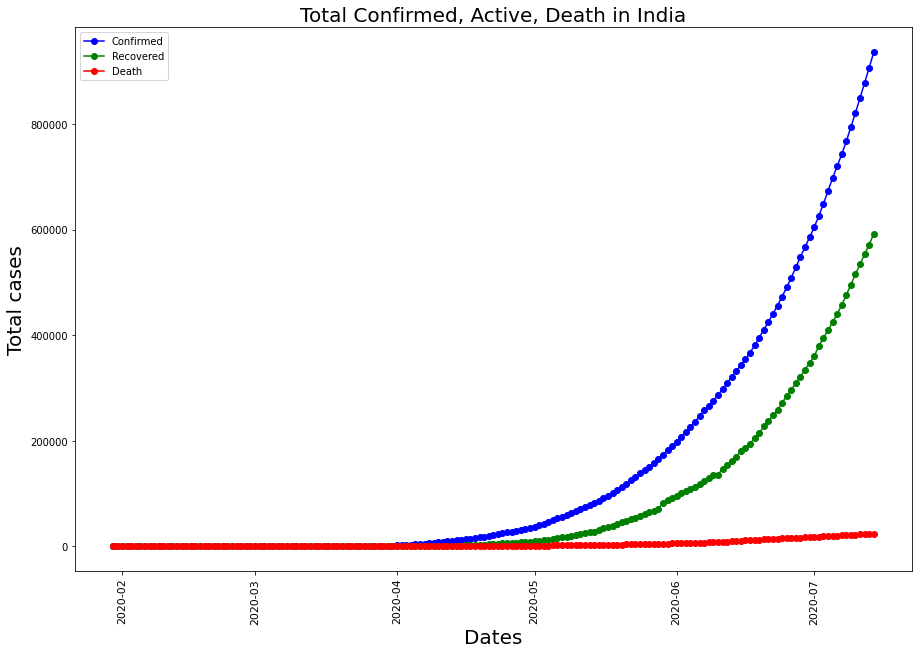

In [ ]:
tes = list(pd.to_datetime(dates))
dates_india = dates[8:]
df1 = confirmed_df.groupby('Country/Region').sum().reset_index()
df2 = deaths_df.groupby('Country/Region').sum().reset_index()
df3 = recovered_df.groupby('Country/Region').sum().reset_index()

k = df1[df1['Country/Region']=='India'].loc[:,'1/30/20':]
india_confirmed = k.values.tolist()[0] 

k = df2[df2['Country/Region']=='India'].loc[:,'1/30/20':]
india_deaths = k.values.tolist()[0] 

k = df3[df3['Country/Region']=='India'].loc[:,'1/30/20':]
india_recovered = k.values.tolist()[0] 

plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Total Confirmed, Active, Death in India" , fontsize = 20)

ax1 = plt.plot_date(y= india_confirmed,x= dates_india,label = 'Confirmed',linestyle ='-',color = 'b')
ax2 = plt.plot_date(y= india_recovered,x= dates_india,label = 'Recovered',linestyle ='-',color = 'g')
ax3 = plt.plot_date(y= india_deaths,x= dates_india,label = 'Death',linestyle ='-',color = 'r')
plt.legend()

 As per result  see that the Total confirmed cases are increased than recovery so far. So that’s graph shows death rate little bit up as compared to recover & confirmed cases.

# Testing LIVE Status

In [ ]:
import json
# get response from the web page
response = requests.get('https://api.covid19india.org/state_test_data.json')

# get contents from the response
content = response.content

# parse the json file
parsed = json.loads(content)

# keys
parsed.keys()

dict_keys(['states_tested_data'])

In [ ]:
# save data in a dataframe
tested = pd.DataFrame(parsed['states_tested_data'])

# first few rows
tested.tail()

,coronaenquirycalls,cumulativepeopleinquarantine,negative,numcallsstatehelpline,numicubeds,numisolationbeds,numventilators,peopleinicu,peopleonventilators,populationncp2019projection,positive,source1,source2,source3,state,tagpeopleinquarantine,tagtotaltested,testpositivityrate,testspermillion,testsperpositivecase,testsperthousand,totaln95masks,totalpeoplecurrentlyinquarantine,totalpeoplereleasedfromquarantine,totalppe,totaltested,unconfirmed,updatedon
3090,,,,,948,,395,,,,27109,https://www.wbhealth.gov.in/uploaded_files/cor...,https://www.wbhealth.gov.in/pages/corona/bulletin,,West Bengal,Government,Tested,,,,,1089040,4905,100356,1728262,593967,,10/07/2020
3091,,,,,948,,395,,,,28453,https://www.wbhealth.gov.in/uploaded_files/cor...,https://www.wbhealth.gov.in/pages/corona/bulletin,,West Bengal,Government,Tested,,,,,1101040,4805,100634,1738262,605370,,11/07/2020
3092,,,,,948,,395,,,,30013,https://www.wbhealth.gov.in/uploaded_files/cor...,https://www.wbhealth.gov.in/pages/corona/bulletin,,West Bengal,Government,Tested,,,,,1111040,4752,100891,1748262,617079,,12/07/2020
3093,,,,,948,,395,,,,31448,https://www.wbhealth.gov.in/uploaded_files/cor...,https://www.wbhealth.gov.in/pages/corona/bulletin,,West Bengal,Government,Tested,,,,,1119040,4512,101167,1759262,627438,,13/07/2020
3094,,,,,948,,395,,,,32838,https://www.wbhealth.gov.in/uploaded_files/cor...,https://www.wbhealth.gov.in/pages/corona/bulletin,,West Bengal,Government,Tested,,,,,1129040,4388,101644,1769262,638540,,14/07/2020


In [ ]:
# fix datatype
tested['updatedon'] = pd.to_datetime(tested['updatedon'])

In [ ]:
# save file as a scv file
tested.to_csv('updated_tests_latest_state_level.csv', index=False)

In [ ]:
state_test_cases = tested.groupby(['updatedon','state'])['totaltested','populationncp2019projection','testpositivityrate',	'testsperpositivecase',	'testsperthousand','totalpeoplecurrentlyinquarantine'].max().reset_index()

In [ ]:
state_test_cases.head(36)

,updatedon,state,totaltested,populationncp2019projection,testpositivityrate,testsperpositivecase,testsperthousand,totalpeoplecurrentlyinquarantine
0,2020-01-04,Delhi,2621,19814000,0.00%,,0.13,
1,2020-01-04,Kerala,7965,35125000,3.33%,30,0.23,622
2,2020-01-04,West Bengal,659,96906000,5.61%,18,0.01,
3,2020-01-05,Andaman and Nicobar Islands,3754,397000,0.88%,114,9.46,643
4,2020-01-05,Andhra Pradesh,102460,52221000,1.43%,70,1.96,
5,2020-01-05,Arunachal Pradesh,724,1504000,0.28%,362,0.48,
6,2020-01-05,Assam,,34293000,,,0.00,
7,2020-01-05,Bihar,24118,119520000,1.93%,52,0.20,2156
8,2020-01-05,Chandigarh,1252,1179000,7.03%,14,1.06,
9,2020-01-05,Chhattisgarh,18039,28724000,0.24%,420,0.63,575


In [ ]:
state_test_cases = tested.groupby('state')['totaltested','populationncp2019projection','testpositivityrate',	'testsperpositivecase',	'testsperthousand','totalpeoplecurrentlyinquarantine'].max()
state_test_cases['testpositivityrate'] = state_test_cases['testpositivityrate'].str.replace('%', '')

In [ ]:
state_test_cases = state_test_cases.apply(pd.to_numeric)

In [ ]:
state_test_cases.nunique()

totaltested                         35
populationncp2019projection         34
testpositivityrate                  34
testsperpositivecase                21
testsperthousand                    31
totalpeoplecurrentlyinquarantine    26
dtype: int64

In [ ]:
state_test_cases.sort_values('totaltested', ascending= False).style.background_gradient(cmap='Blues',subset=["totaltested"])\
                        .background_gradient(cmap='Blues',subset=["populationncp2019projection"])\
                        .background_gradient(cmap='Blues',subset=["testpositivityrate"])\
                        .background_gradient(cmap='Blues',subset=["testsperpositivecase"])\
                        .background_gradient(cmap='Blues',subset=["testsperthousand"])\
                        .background_gradient(cmap='Blues',subset=["totalpeoplecurrentlyinquarantine"])
                       

,totaltested,populationncp2019projection,testpositivityrate,testsperpositivecase,testsperthousand,totalpeoplecurrentlyinquarantine
state,,,,,,
Andhra Pradesh,996573,52221000,7.330000,94,9.770000,nan
Maharashtra,995343,122153000,9.070000,9,9.320000,nan
Uttar Pradesh,988960,224979000,5.290000,41,3.960000,9911.000000
Rajasthan,987272,77264000,2.880000,49,9.970000,nan
Haryana,99987,28672000,5.770000,87,9.660000,50992.000000
Jharkhand,99931,37403000,1.790000,99,4.260000,99641.000000
Kerala,99692,35125000,3.380000,83,7.850000,992.000000
Madhya Pradesh,99677,82232000,9.770000,27,5.080000,nan
Bihar,99108,119520000,5.730000,95,2.750000,802.000000


Number of ICMR Testing Centres in each state

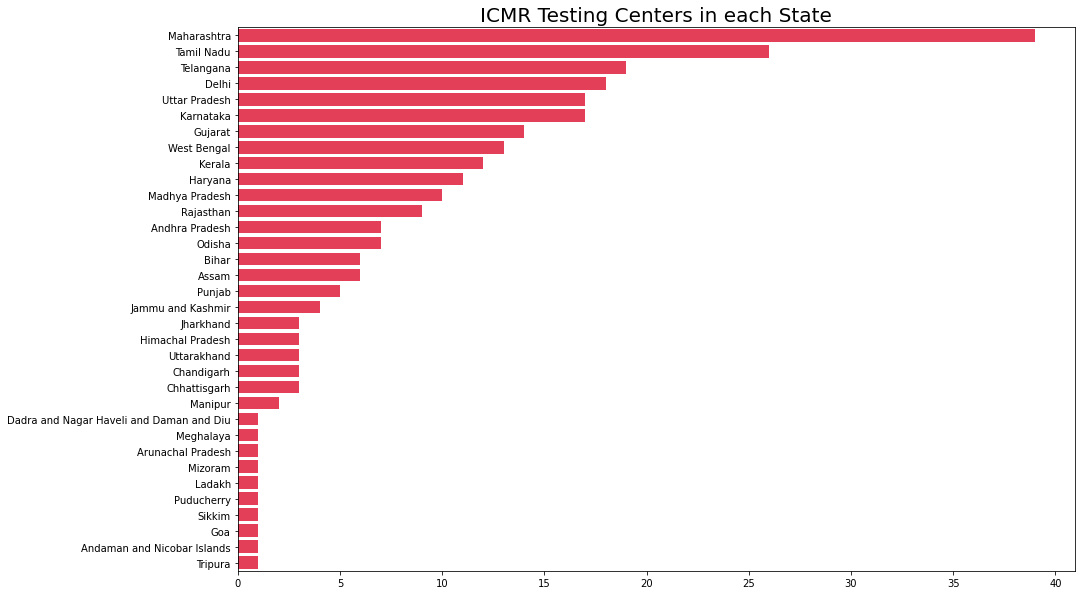

In [ ]:
values = list(ICMR_labs['state'].value_counts())
names = list(ICMR_labs['state'].value_counts().index)

plt.figure(figsize=(15,10))
sns.set_color_codes("pastel")
plt.title('ICMR Testing Centers in each State', fontsize = 20)
sns.barplot(x= values, y= names,color = '#ff2345');

## Prediction

In [ ]:
train = pd.read_csv('/content/drive/My Drive/covid_19/train.csv')
test = pd.read_csv('/content/drive/My Drive/covid_19/test.csv')
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [ ]:
!pip install Prophet

     |████████████████████████████████| 92kB 2.4MB/s 
  Created wheel for Prophet: filename=prophet-0.1.1.post1-cp36-none-any.whl size=13236 sha256=ec81a799dd6de1614815d6332bd14bba5c502a14ba03041948d89bc79be59db2
  Stored in directory: /root/.cache/pip/wheels/71/d7/4f/0ade9b5843362f84d39c21edbe6065032e388053c4ab0ab83e
Successfully built Prophet


In [ ]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot

k = df1[df1['Country/Region']=='India'].loc[:,'1/22/20':]
confirmedCases = k.values.tolist()[0] 
data = pd.DataFrame(columns = ['ds','y'])
data['ds'] = dates
data['y'] = confirmedCases

The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [ ]:
confirmedCases = ['ds','y']

 Forecasting Confirmed NCOVID-19 Cases Worldwide with Prophet (Base model)
Generating a week ahead forecast of confirmed cases of NCOVID-19 using Prophet, with 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors.

In [ ]:
prop = Prophet(interval_width=0.95)
prop.fit(data)
future = prop.make_future_dataframe(periods=15)
future.tail(15)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
175,2020-07-15
176,2020-07-16
177,2020-07-17
178,2020-07-18
179,2020-07-19
180,2020-07-20
181,2020-07-21
182,2020-07-22
183,2020-07-23
184,2020-07-24


The predict method will assign each row in future a predicted value which it names yhat. If you pass in historical dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

In [ ]:
#predicting the future with date, and upper and lower limit of y value
forecast = prop.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
185,2020-07-25,1.062330e+06,1.029239e+06,1.093197e+06
186,2020-07-26,1.080948e+06,1.050188e+06,1.113577e+06
187,2020-07-27,1.099245e+06,1.065182e+06,1.136733e+06
188,2020-07-28,1.117709e+06,1.082411e+06,1.154808e+06
189,2020-07-29,1.132730e+06,1.094049e+06,1.169338e+06


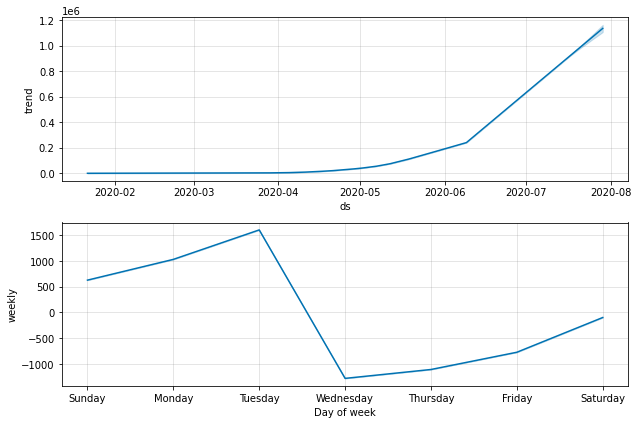

In [ ]:
confirmed_forecast_plot =prop.plot_components(forecast)

As per Result see that pandemic of the virus has spread widely, and the number of cases is rising daily. 
Weekly trend shows Sunday and Monday are more confirmed cases reported


# ARIMA

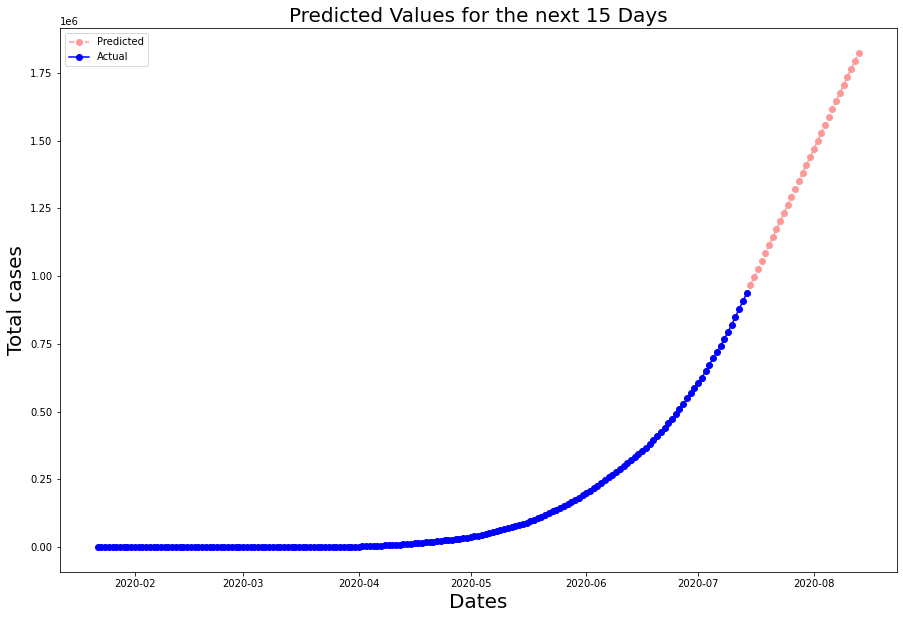

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

from datetime import timedelta 

arima = ARIMA(data['y'], order=(5, 1, 0))
arima = arima.fit(trend='c', full_output=True, disp=True)
forecast = arima.forecast(steps= 30)
pred = list(forecast[0])

start_date = data['ds'].max()
prediction_dates = []
for i in range(30):
    date = start_date + timedelta(days=1)
    prediction_dates.append(date)
    start_date = date
plt.figure(figsize= (15,10))
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Predicted Values for the next 15 Days" , fontsize = 20)

plt.plot_date(y= pred,x= prediction_dates,linestyle ='dashed',color = '#ff9999',label = 'Predicted');
plt.plot_date(y=data['y'],x=data['ds'],linestyle = '-',color = 'blue',label = 'Actual');
plt.legend();

# Exploring World wide data

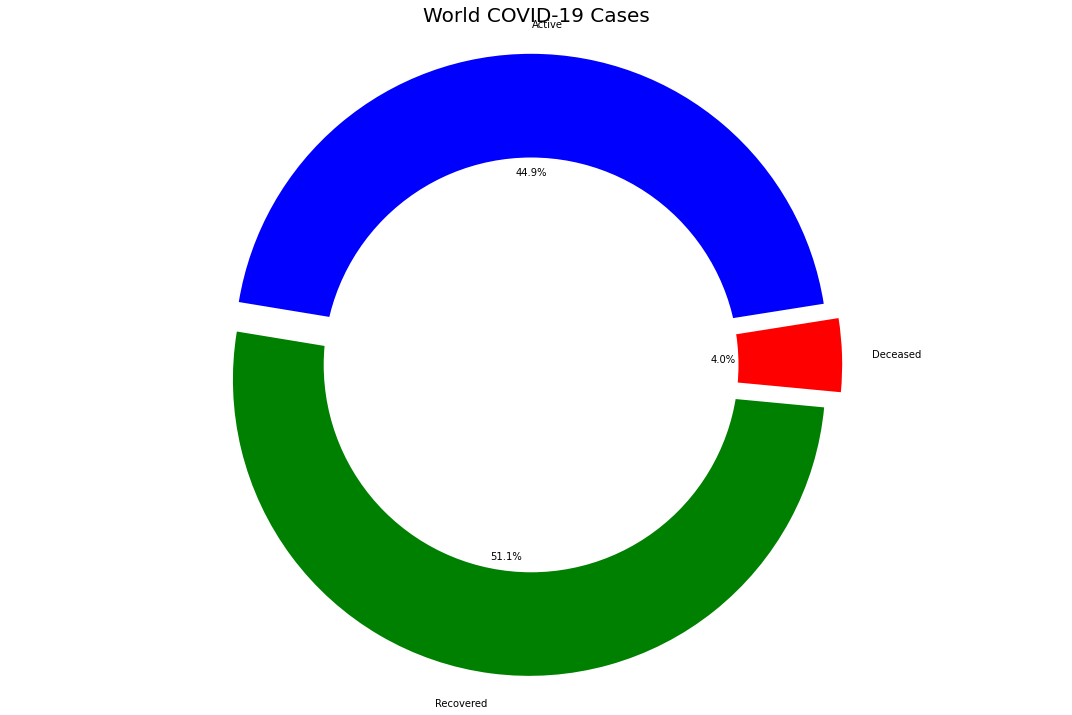

In [ ]:
world_confirmed = confirmed_df[confirmed_df.columns[-1:]].sum()
world_recovered = recovered_df[recovered_df.columns[-1:]].sum()
world_deaths = deaths_df[deaths_df.columns[-1:]].sum()
world_active = world_confirmed - (world_recovered - world_deaths)

labels = ['Active','Recovered','Deceased']
sizes = [world_active,world_recovered,world_deaths]
color= ['blue','green','red']
explode = []

for i in labels:
    explode.append(0.05)
    
plt.figure(figsize= (15,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, explode = explode,colors = color)
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('World COVID-19 Cases',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()

In [ ]:
dates

[Timestamp('2020-01-22 00:00:00'),
 Timestamp('2020-01-23 00:00:00'),
 Timestamp('2020-01-24 00:00:00'),
 Timestamp('2020-01-25 00:00:00'),
 Timestamp('2020-01-26 00:00:00'),
 Timestamp('2020-01-27 00:00:00'),
 Timestamp('2020-01-28 00:00:00'),
 Timestamp('2020-01-29 00:00:00'),
 Timestamp('2020-01-30 00:00:00'),
 Timestamp('2020-01-31 00:00:00'),
 Timestamp('2020-02-01 00:00:00'),
 Timestamp('2020-02-02 00:00:00'),
 Timestamp('2020-02-03 00:00:00'),
 Timestamp('2020-02-04 00:00:00'),
 Timestamp('2020-02-05 00:00:00'),
 Timestamp('2020-02-06 00:00:00'),
 Timestamp('2020-02-07 00:00:00'),
 Timestamp('2020-02-08 00:00:00'),
 Timestamp('2020-02-09 00:00:00'),
 Timestamp('2020-02-10 00:00:00'),
 Timestamp('2020-02-11 00:00:00'),
 Timestamp('2020-02-12 00:00:00'),
 Timestamp('2020-02-13 00:00:00'),
 Timestamp('2020-02-14 00:00:00'),
 Timestamp('2020-02-15 00:00:00'),
 Timestamp('2020-02-16 00:00:00'),
 Timestamp('2020-02-17 00:00:00'),
 Timestamp('2020-02-18 00:00:00'),
 Timestamp('2020-02-

In [ ]:
countries = ['China','Germany','Iran','Italy','Spain','US','Korea, South','France','United Kingdom','India']

global_confirmed = []
global_recovered = []
global_deaths = []

for country in countries:
    k =df1[df1['Country/Region'] == country].loc[:,'1/30/20':]
    global_confirmed.append(k.values.tolist()[0]) 

    k =df2[df2['Country/Region'] == country].loc[:,'1/30/20':]
    global_deaths.append(k.values.tolist()[0]) 

    k =df3[df3['Country/Region'] == country].loc[:,'1/30/20':]
    global_deaths.append(k.values.tolist()[0])  

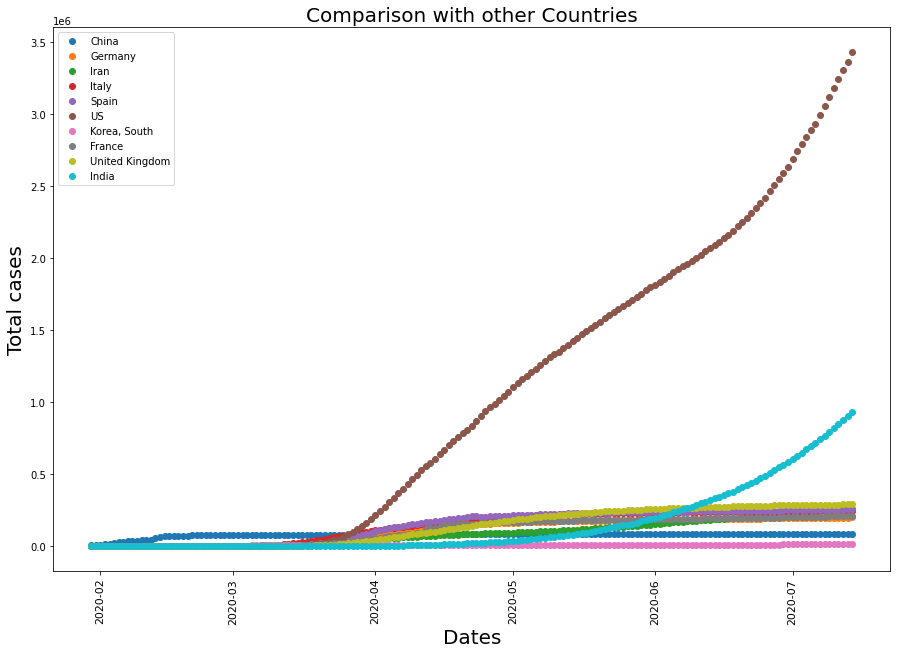

In [ ]:
plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Comparison with other Countries" , fontsize = 20)

for i in range(len(countries)):
    plt.plot_date(y= global_confirmed[i],x= dates_india,label = countries[i])
plt.legend();

# References 

•	https://facebook.github.io/prophet/
•	https://facebook.github.io/prophet/docs/
•	https://github.com/facebook/prophet
•	https://facebook.github.io/prophet/docs/quick_start.html
•	https://www.edureka.co/


# Data Source:

•	https://www.mohfw.gov.in/
•	https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset
•	https://www.worldometers.info/coronavirus/#countries
•	https://api.covid19india.org/
